In [1]:
from simple_grid_wrapper import SimpleGridEnvWrapper
import matplotlib.pyplot as plt
from collections import defaultdict
import gym
import pandas as pd
import sinergym
import numpy as np
from sinergym_reward import FangerReward
from sinergym.utils.constants import *
from sinergym.utils.rewards import *
import sinergym_wrapper

/home/doseok/miniconda3/envs/ActiveRL/lib/python3.10/site-packages/gym/spaces/box.py:112: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [2]:
env = gym.make('Eplus-5Zone-hot-discrete-stochastic-v1-FlexibleReset', reward=FangerReward,
                        reward_kwargs={
                            'energy_variable': 'Facility Total HVAC Electricity Demand Rate(Whole Building)',
                            'ppd_variable': 'Zone Thermal Comfort Fanger Model PPD(SPACE1-1 PEOPLE 1)',
                            'occupancy_variable': 'Zone People Occupant Count(SPACE1-1)'
                        })
pd.set_option('display.max_columns', None)
env.simulator._config.weather_data.get_weather_series().describe()


/mnt/7076984276980B4C/ssd_backup/ActiveRL/sinergym_wrapper.py:291: DeprecationWarning: getName() is deprecated, get the name attribute instead
  self._thread_name = threading.current_thread().getName()


[2023-01-27 12:39:38,119] EPLUS_ENV_5Zone-hot-discrete-stochastic-v1_MainThread_ROOT INFO:Updating idf ExternalInterface object if it is not present...
[2023-01-27 12:39:38,120] EPLUS_ENV_5Zone-hot-discrete-stochastic-v1_MainThread_ROOT INFO:Updating idf Site:Location and SizingPeriod:DesignDay(s) to weather and ddy file...
[2023-01-27 12:39:38,121] EPLUS_ENV_5Zone-hot-discrete-stochastic-v1_MainThread_ROOT INFO:Updating idf OutPut:Variable and variables XML tree model for BVCTB connection.
[2023-01-27 12:39:38,122] EPLUS_ENV_5Zone-hot-discrete-stochastic-v1_MainThread_ROOT INFO:Setting up extra configuration in building model if exists...
[2023-01-27 12:39:38,122] EPLUS_ENV_5Zone-hot-discrete-stochastic-v1_MainThread_ROOT INFO:Setting up action definition in building model if exists...


/home/doseok/miniconda3/envs/ActiveRL/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:97: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  logger.warn(


,year,month,day,hour,minute,drybulb,dewpoint,relhum,atmos_pressure,exthorrad,extdirrad,horirsky,glohorrad,dirnorrad,difhorrad,glohorillum,dirnorillum,difhorillum,zenlum,winddir,windspd,totskycvr,opaqskycvr,visibility,ceiling_hgt,presweathobs,precip_wtr,aerosol_opt_depth,snowdepth,days_last_snow,Albedo,liq_precip_depth,liq_precip_rate
count,8760.000000,8760.000000,8760.000000,8760.000000,0.0,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,0.0,8760.000000,8760.000000,8760.0,8760.0,8760.000000,473.000000,473.000000
mean,2001.397260,6.526027,15.720548,12.500000,NaN,21.705537,2.331598,34.918037,92091.358447,360.089726,688.956164,356.268607,228.584247,278.224429,61.551027,24115.360502,26641.092922,7570.920320,2186.366667,191.359932,3.279737,3.310845,3.031279,56.092842,55719.581621,NaN,150.351941,0.067836,0.0,88.0,0.186575,0.634249,6.133192
std,3.683344,3.448048,8.796749,6.922582,NaN,9.003335,8.452790,23.782531,308.030034,441.720462,660.504791,50.908361,311.258186,358.688955,86.422528,32635.774908,35283.902812,9956.254002,3948.211811,82.218378,1.811650,3.625974,3.273774,43.705695,33455.145003,NaN,84.068268,0.024476,0.0,0.0,0.010287,2.467468,2.896743
min,1994.000000,1.000000,1.000000,1.000000,NaN,-1.100000,-21.000000,3.000000,91100.000000,0.000000,0.000000,230.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.200000,0.000000,NaN,20.000000,0.035000,0.0,88.0,0.170000,0.000000,3.000000
25%,1997.000000,4.000000,8.000000,6.750000,NaN,14.675000,-4.000000,16.000000,91900.000000,0.000000,0.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.000000,2.100000,0.000000,0.000000,32.200000,7500.000000,NaN,89.000000,0.040000,0.0,88.0,0.180000,0.000000,6.000000
50%,2003.000000,7.000000,16.000000,12.500000,NaN,22.000000,2.000000,29.000000,92100.000000,39.000000,760.000000,352.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,170.000000,3.000000,3.000000,3.000000,56.300000,77777.000000,NaN,129.000000,0.072000,0.0,88.0,0.190000,0.000000,6.000000
75%,2004.000000,10.000000,23.000000,18.250000,NaN,29.000000,9.000000,48.000000,92300.000000,761.000000,1353.000000,395.000000,450.250000,669.000000,108.000000,47800.000000,63400.000000,13500.000000,2650.000000,270.000000,4.100000,6.000000,5.000000,80.500000,77777.000000,NaN,200.000000,0.091000,0.0,88.0,0.190000,0.000000,6.000000
max,2005.000000,12.000000,31.000000,24.000000,NaN,42.000000,22.000000,100.000000,93100.000000,1305.000000,1415.000000,486.000000,1064.000000,1033.000000,588.000000,111100.000000,103600.000000,65000.000000,37250.000000,360.000000,13.900000,10.000000,10.000000,777.700000,77777.000000,NaN,450.000000,0.102000,0.0,88.0,0.200000,21.000000,24.000000


In [3]:
from copy import deepcopy
from sinergym.utils.controllers import RBC5Zone
import _thread
import logging
import os
import signal
import socket
import subprocess
import threading
import time
from typing import Any, Dict, List, Optional, Tuple, Union
from xml.etree.ElementTree import Element, SubElement, tostring

import numpy as np
from sinergym.utils.rewards import ExpReward, LinearReward
from sinergym.utils.constants import PKG_DATA_PATH
from sinergym.utils.common import *
from sinergym.utils.config import Config
from sinergym.utils.logger import Logger
from sinergym.simulators.eplus import EnergyPlus
from sinergym.envs.eplus_env import EplusEnv

In [4]:
LOG_LEVEL_MAIN = 'INFO'
LOG_LEVEL_EPLS = 'FATAL'
LOG_FMT = "[%(asctime)s] %(name)s %(levelname)s:%(message)s"

class ResetConfig(Config):
    """ Custom configuration class that extends apply_weather_variability to more flexibly change more weather aspects"""
    def apply_weather_variability(
            self,
            variation: Optional[Dict] = None) -> str:
        """Modify weather data using Ornstein-Uhlenbeck process.
        Args:
            variation (Dict, optional): Maps columns to be affected to the corresponding Ornstein-Uhlenbeck process parameters.
                The OU parameters should be specified as a Tuple with the sigma, mean and tau for the OU process.
                For example, one could pass {'drybulb': (1, 0, 0.001)} to make the drybulb temperatures change according to an OU with
                parameters 1, 0, and 0.001 and sigma, mean, and tau respectively.
        Returns:
            str: New EPW file path generated in simulator working path in that episode or current EPW path if variation is not defined.
        """
        if variation is None:
            return self._weather_path
        else:
            # deepcopy for weather_data
            weather_data_mod = deepcopy(self.weather_data)
            # Get dataframe with weather series
            df = weather_data_mod.get_weather_series()
            for column, col_variation in variation.items():
                sigma = col_variation[0]  # Standard deviation.
                mu = col_variation[1]  # Mean.
                tau = col_variation[2]  # Time constant.

                T = 1.  # Total time.
                # All the columns are going to have the same num of rows since they are
                # in the same dataframe
                n = len(df[column])
                dt = T / n
                # t = np.linspace(0., T, n)  # Vector of times.

                sigma_bis = sigma * np.sqrt(2. / tau)
                sqrtdt = np.sqrt(dt)

                x = np.zeros(n)

                # Create noise
                for i in range(n - 1):
                    x[i + 1] = x[i] + dt * (-(x[i] - mu) / tau) + \
                        sigma_bis * sqrtdt * np.random.randn()

                # Add noise
                df[column] += x

            # Save new weather data
            weather_data_mod.set_weather_series(df)

            filename = self._weather_path.split('/')[-1]
            filename = filename.split('.epw')[0]
            filename += '_Random_%s_%s_%s.epw' % (
                str(sigma), str(mu), str(tau))
            episode_weather_path = self.episode_path + '/' + filename
            weather_data_mod.to_epw(episode_weather_path)
            return episode_weather_path


class EPlusResetSimulator(EnergyPlus):
    """Exactly the same as EplusEnv, except the reset function can reset things other than drybulb temps"""
    def __init__(
            self,
            eplus_path: str,
            weather_path: str,
            bcvtb_path: str,
            idf_path: str,
            env_name: str,
            variables: Dict[str, List[str]],
            act_repeat: int = 1,
            max_ep_data_store_num: int = 10,
            action_definition: Optional[Dict[str, Any]] = None,
            config_params: Optional[Dict[str, Any]] = None):
        """EnergyPlus simulation class.
        Args:
            eplus_path (str):  EnergyPlus installation path.
            weather_path (str): EnergyPlus weather file (.epw) path.
            bcvtb_path (str): BCVTB installation path.
            idf_path (str): EnergyPlus input description file (.idf) path.
            env_name (str): The environment name.
            variables (Dict[str,List[str]]): Variables list with observation and action keys in a dictionary.
            act_repeat (int, optional): The number of times to repeat the control action. Defaults to 1.
            max_ep_data_store_num (int, optional): The number of simulation results to keep. Defaults to 10.
            config_params (Optional[Dict[str, Any]], optional): Dictionary with all extra configuration for simulator. Defaults to None.
        """
        self._env_name = env_name
        self._thread_name = threading.current_thread().getName()
        self.logger_main = Logger().getLogger(
            'EPLUS_ENV_%s_%s_ROOT' %
            (env_name, self._thread_name), LOG_LEVEL_MAIN, LOG_FMT)

        # Set the environment variable for bcvtb
        os.environ['BCVTB_HOME'] = bcvtb_path
        # Create a socket for communication with the EnergyPlus
        self.logger_main.debug('Creating socket for communication...')
        self._socket = socket.socket()
        # Get local machine name
        self._host = socket.gethostname()
        # Bind to the host and any available port
        self._socket.bind((self._host, 0))
        # Get the port number
        sockname = self._socket.getsockname()
        self._port = sockname[1]
        # Listen on request
        self._socket.listen(60)

        self.logger_main.debug(
            'Socket is listening on host %s port %d' % (sockname))

        # Path attributes
        self._eplus_path = eplus_path
        self._weather_path = weather_path
        self._idf_path = idf_path
        # Episode existed
        self._episode_existed = False

        self._epi_num = 0
        self._act_repeat = act_repeat
        self._max_ep_data_store_num = max_ep_data_store_num
        self._last_action = [21.0, 25.0]

        # Creating models config (with extra params if exits)
        self._config = ResetConfig(
            idf_path=self._idf_path,
            weather_path=self._weather_path,
            variables=variables,
            env_name=self._env_name,
            max_ep_store=self._max_ep_data_store_num,
            action_definition=action_definition,
            extra_config=config_params)

        # Annotate experiment path in simulator
        self._env_working_dir_parent = self._config.experiment_path
        # Setting an external interface if IDF building has not got.
        self.logger_main.info(
            'Updating idf ExternalInterface object if it is not present...')
        self._config.set_external_interface()
        # Updating IDF file (Location and DesignDays) with EPW file
        self.logger_main.info(
            'Updating idf Site:Location and SizingPeriod:DesignDay(s) to weather and ddy file...')
        self._config.adapt_idf_to_epw()
        # Updating IDF file Output:Variables with observation variables
        # specified in environment and variables.cfg construction
        self.logger_main.info(
            'Updating idf OutPut:Variable and variables XML tree model for BVCTB connection.')
        self._config. adapt_variables_to_cfg_and_idf()
        # Setting up extra configuration if exists
        self.logger_main.info(
            'Setting up extra configuration in building model if exists...')
        self._config.apply_extra_conf()
        # Setting up action definition automatic manipulation if exists
        self.logger_main.info(
            'Setting up action definition in building model if exists...')
        self._config.adapt_idf_to_action_definition()

        # In this lines Epm model is modified but no IDF is stored anywhere yet

        # Eplus run info
        (self._eplus_run_st_mon,
         self._eplus_run_st_day,
         self._eplus_run_st_year,
         self._eplus_run_ed_mon,
         self._eplus_run_ed_day,
         self._eplus_run_ed_year,
         self._eplus_run_st_weekday,
         self._eplus_n_steps_per_hour) = self._config._get_eplus_run_info()

        # Eplus one epi len
        self._eplus_one_epi_len = self._config._get_one_epi_len()
        # Stepsize in seconds
        self._eplus_run_stepsize = 3600 / self._eplus_n_steps_per_hour

class EPlusResetEnv(EplusEnv):
    """Exactly the same as EplusEnv, except the reset function can reset things other than drybulb temps"""
    def __init__(
        self,
        idf_file: str,
        weather_file: str,
        observation_space: gym.spaces.Box = gym.spaces.Box(
            low=-5e6, high=5e6, shape=(4,)),
        observation_variables: List[str] = [],
        action_space: Union[gym.spaces.Box, gym.spaces.Discrete] = gym.spaces.Box(
            low=0, high=0, shape=(0,)),
        action_variables: List[str] = [],
        action_mapping: Dict[int, Tuple[float, ...]] = {},
        weather_variability: Optional[Dict] = None,
        reward: Any = LinearReward,
        reward_kwargs: Optional[Dict[str, Any]] = {},
        act_repeat: int = 1,
        max_ep_data_store_num: int = 10,
        action_definition: Optional[Dict[str, Any]] = None,
        env_name: str = 'eplus-env-v1',
        config_params: Optional[Dict[str, Any]] = None
    ):
        """Environment with EnergyPlus simulator.
        Args:
            idf_file (str): Name of the IDF file with the building definition.
            weather_file (str): Name of the EPW file for weather conditions.
            observation_space (gym.spaces.Box, optional): Gym Observation Space definition. Defaults to an empty observation_space (no control).
            observation_variables (List[str], optional): List with variables names in IDF. Defaults to an empty observation variables (no control).
            action_space (Union[gym.spaces.Box, gym.spaces.Discrete], optional): Gym Action Space definition. Defaults to an empty action_space (no control).
            action_variables (List[str],optional): Action variables to be controlled in IDF, if that actions names have not been configured manually in IDF, you should configure or use extra_config. Default to empty List.
            action_mapping (Dict[int, Tuple[float, ...]], optional): Action mapping list for discrete actions spaces only. Defaults to empty list.
            weather_variability (Optional[Tuple[float]], optional): Tuple with sigma, mu and tao of the Ornstein-Uhlenbeck process to be applied to weather data. Defaults to None.
            reward (Any, optional): Reward function instance used for agent feedback. Defaults to LinearReward.
            reward_kwargs (Optional[Dict[str, Any]], optional): Parameters to be passed to the reward function. Defaults to empty dict.
            act_repeat (int, optional): Number of timesteps that an action is repeated in the simulator, regardless of the actions it receives during that repetition interval.
            max_ep_data_store_num (int, optional): Number of last sub-folders (one for each episode) generated during execution on the simulation.
            action_definition (Optional[Dict[str, Any]): Dict with building components to being controlled by Sinergym automatically if it is supported. Default value to None.
            env_name (str, optional): Env name used for working directory generation. Defaults to eplus-env-v1.
            config_params (Optional[Dict[str, Any]], optional): Dictionary with all extra configuration for simulator. Defaults to None.
        """

        # ---------------------------------------------------------------------------- #
        #                          Energyplus, BCVTB and paths                         #
        # ---------------------------------------------------------------------------- #
        eplus_path = os.environ['EPLUS_PATH']
        bcvtb_path = os.environ['BCVTB_PATH']
        self.pkg_data_path = PKG_DATA_PATH

        self.idf_path = os.path.join(self.pkg_data_path, 'buildings', idf_file)
        self.weather_path = os.path.join(
            self.pkg_data_path, 'weather', weather_file)

        # ---------------------------------------------------------------------------- #
        #                             Variables definition                             #
        # ---------------------------------------------------------------------------- #
        self.variables = {}
        self.variables['observation'] = observation_variables
        self.variables['action'] = action_variables

        # ---------------------------------------------------------------------------- #
        #                                   Simulator                                  #
        # ---------------------------------------------------------------------------- #
        self.simulator = EPlusResetSimulator(
            env_name=env_name,
            eplus_path=eplus_path,
            bcvtb_path=bcvtb_path,
            idf_path=self.idf_path,
            weather_path=self.weather_path,
            variables=self.variables,
            act_repeat=act_repeat,
            max_ep_data_store_num=max_ep_data_store_num,
            action_definition=action_definition,
            config_params=config_params
        )

        # ---------------------------------------------------------------------------- #
        #                       Detection of controllable planners                     #
        # ---------------------------------------------------------------------------- #
        self.schedulers = self.get_schedulers()

        # ---------------------------------------------------------------------------- #
        #        Adding simulation date to observation (not needed in simulator)       #
        # ---------------------------------------------------------------------------- #

        self.variables['observation'] = ['year', 'month',
                                         'day', 'hour'] + self.variables['observation']

        # ---------------------------------------------------------------------------- #
        #                              Weather variability                             #
        # ---------------------------------------------------------------------------- #
        self.weather_variability = weather_variability

        # ---------------------------------------------------------------------------- #
        #                               Observation Space                              #
        # ---------------------------------------------------------------------------- #
        self.observation_space = observation_space

        # ---------------------------------------------------------------------------- #
        #                                 Action Space                                 #
        # ---------------------------------------------------------------------------- #
        # Action space type
        self.flag_discrete = (
            isinstance(
                action_space,
                gym.spaces.Discrete))

        # Discrete
        if self.flag_discrete:
            self.action_mapping = action_mapping
            self.action_space = action_space
        # Continuous
        else:
            # Defining action values setpoints (one per value)
            self.setpoints_space = action_space

            self.action_space = gym.spaces.Box(
                # continuous_action_def[2] --> shape
                low=np.repeat(-1, action_space.shape[0]),
                high=np.repeat(1, action_space.shape[0]),
                dtype=action_space.dtype
            )

        # ---------------------------------------------------------------------------- #
        #                                    Reward                                    #
        # ---------------------------------------------------------------------------- #
        self.reward_fn = reward(self, **reward_kwargs)
        self.obs_dict = None

        # ---------------------------------------------------------------------------- #
        #                        Environment definition checker                        #
        # ---------------------------------------------------------------------------- #

        self._check_eplus_env()

variables = deepcopy(env.variables)
variables["observation"] = variables["observation"][4:]
env = EPlusResetEnv(**{'idf_file': '5ZoneAutoDXVAV.idf',
        'weather_file': 'USA_AZ_Davis-Monthan.AFB.722745_TMY3.epw',
        'observation_space': DEFAULT_5ZONE_OBSERVATION_SPACE,
        'observation_variables': DEFAULT_5ZONE_OBSERVATION_VARIABLES,
        'action_space': DEFAULT_5ZONE_ACTION_SPACE_DISCRETE,
        'action_variables': DEFAULT_5ZONE_ACTION_VARIABLES,
        'action_mapping': DEFAULT_5ZONE_ACTION_MAPPING,
        'weather_variability': {"drybulb": (
            1.0,
            0.0,
            0.001)},
        'reward': FangerReward,
        'reward_kwargs': {
                            'energy_variable': 'Facility Total HVAC Electricity Demand Rate(Whole Building)',
                            'ppd_variable': 'Zone Thermal Comfort Fanger Model PPD(SPACE1-1 PEOPLE 1)',
                            'occupancy_variable': 'Zone People Occupant Count(SPACE1-1)'
                        },
        'env_name': '5Zone-hot-discrete-stochastic-v1',
        'action_definition': DEFAULT_5ZONE_ACTION_DEFINITION})

/tmp/ipykernel_1880799/2713197402.py:90: DeprecationWarning: getName() is deprecated, get the name attribute instead
  self._thread_name = threading.current_thread().getName()


[2023-01-27 12:39:38,949] EPLUS_ENV_5Zone-hot-discrete-stochastic-v1_MainThread_ROOT INFO:Updating idf ExternalInterface object if it is not present...
[2023-01-27 12:39:38,949] EPLUS_ENV_5Zone-hot-discrete-stochastic-v1_MainThread_ROOT INFO:Updating idf ExternalInterface object if it is not present...
[2023-01-27 12:39:38,950] EPLUS_ENV_5Zone-hot-discrete-stochastic-v1_MainThread_ROOT INFO:Updating idf Site:Location and SizingPeriod:DesignDay(s) to weather and ddy file...
[2023-01-27 12:39:38,950] EPLUS_ENV_5Zone-hot-discrete-stochastic-v1_MainThread_ROOT INFO:Updating idf Site:Location and SizingPeriod:DesignDay(s) to weather and ddy file...
[2023-01-27 12:39:38,952] EPLUS_ENV_5Zone-hot-discrete-stochastic-v1_MainThread_ROOT INFO:Updating idf OutPut:Variable and variables XML tree model for BVCTB connection.
[2023-01-27 12:39:38,952] EPLUS_ENV_5Zone-hot-discrete-stochastic-v1_MainThread_ROOT INFO:Updating idf OutPut:Variable and variables XML tree model for BVCTB connection.
[2023-01

In [5]:
def get_observations_df(reset_params = None, use_wrapper = False):
    rbc = RBC5Zone(env)
    observations = {}
    for i in range(1):
        if use_wrapper:
            obs = env.reset(reset_params)
        else:
            obs = env.reset()
            _, obs, _ = env.simulator.reset(reset_params)
        rewards = []
        done = False
        current_month = 0
        while not done:
            a = rbc.act(obs)
            obs, reward, done, info = env.step(a)
            rewards.append(reward)
            if info['month'] != current_month:  # display results every month
                current_month = info['month']
                print('Reward: ', sum(rewards), info)
            for k, v in env.obs_dict.items():
                if k not in observations:
                    observations[k] = []
                observations[k].append(v)
        print(
            'Episode ',
            i,
            'Mean reward: ',
            np.mean(rewards),
            'Cumulative reward: ',
            sum(rewards))
    df = pd.DataFrame.from_dict(observations)
    return df

#env.simulator._config.building.schedule_compact._records["occupy-1"]._data#__dict__.keys()

In [6]:
df = get_observations_df()
df2 = get_observations_df(
        {k: (1.0, -50, 0.001) for k in ["drybulb", "relhum", "winddir", "windspd"]}
)


[2023-01-27 12:39:39,075] EPLUS_ENV_5Zone-hot-discrete-stochastic-v1_MainThread_ROOT INFO:Creating new EnergyPlus simulation episode...
[2023-01-27 12:39:39,075] EPLUS_ENV_5Zone-hot-discrete-stochastic-v1_MainThread_ROOT INFO:Creating new EnergyPlus simulation episode...
[2023-01-27 12:39:39,191] EPLUS_ENV_5Zone-hot-discrete-stochastic-v1_MainThread_ROOT INFO:EnergyPlus working directory is in /mnt/7076984276980B4C/ssd_backup/ActiveRL/Eplus-env-5Zone-hot-discrete-stochastic-v1-res12/Eplus-env-sub_run1
[2023-01-27 12:39:39,191] EPLUS_ENV_5Zone-hot-discrete-stochastic-v1_MainThread_ROOT INFO:EnergyPlus working directory is in /mnt/7076984276980B4C/ssd_backup/ActiveRL/Eplus-env-5Zone-hot-discrete-stochastic-v1-res12/Eplus-env-sub_run1
[2023-01-27 12:39:44,638] EPLUS_ENV_5Zone-hot-discrete-stochastic-v1_MainThread_ROOT INFO:EnergyPlus episode completed successfully. 
[2023-01-27 12:39:44,638] EPLUS_ENV_5Zone-hot-discrete-stochastic-v1_MainThread_ROOT INFO:EnergyPlus episode completed succe

In [7]:
import contextlib
from queue import Queue
vars_to_try = Queue()
variables = ["drybulb", "relhum", "winddir", "windspd", "precip_wtr", "snowdepth"]
base_var_dict = {k: (1.0, 0, 0.001) for k in variables}
vars_to_try.put(base_var_dict)
offset = 30
seen_dict = {}
dfs = []
idx = 0
# while not vars_to_try.empty():
#     curr_dict = vars_to_try.get()
#     frozen_dict = frozenset(tuple(sorted(curr_dict.items())))
#     print(frozen_dict)
#     if seen_dict.get(frozen_dict, False):
#         continue
    
#     seen_dict[frozenset(frozen_dict)] = True
    
#     with open(os.devnull, 'w') as devnull:
#         with contextlib.redirect_stdout(devnull):
#             df = get_observations_df(curr_dict)
#     df.to_csv(f"data/exploration_new/df{idx}.csv")
#     idx += 1
#     dfs.append(df)
#     for key, var in curr_dict.items():
        
#         if var[1] == 0:
#             next_dict = deepcopy(curr_dict)
#             next_var = (var[0], offset, var[2])
#             next_dict[key] = next_var
#             vars_to_try.put(next_dict)
            
#             next_dict2 = deepcopy(curr_dict)
#             next_var2 = (var[0], -offset, var[2])
#             next_dict2[key] = next_var2
#             vars_to_try.put(next_dict2)


In [8]:
# big_df = pd.concat(dfs)
# big_df.to_csv("data/exploration_new/bigdf.csv")
big_df = pd.read_csv("data/exploration_new/bigdf.csv")

In [9]:
big_df.head()

,Unnamed: 0,year,month,day,hour,Site Outdoor Air Drybulb Temperature(Environment),Site Outdoor Air Relative Humidity(Environment),Site Wind Speed(Environment),Site Wind Direction(Environment),Site Diffuse Solar Radiation Rate per Area(Environment),Site Direct Solar Radiation Rate per Area(Environment),Zone Thermostat Heating Setpoint Temperature(SPACE1-1),Zone Thermostat Cooling Setpoint Temperature(SPACE1-1),Zone Air Temperature(SPACE1-1),Zone Thermal Comfort Mean Radiant Temperature(SPACE1-1 PEOPLE 1),Zone Air Relative Humidity(SPACE1-1),Zone Thermal Comfort Clothing Value(SPACE1-1 PEOPLE 1),Zone Thermal Comfort Fanger Model PPD(SPACE1-1 PEOPLE 1),Zone People Occupant Count(SPACE1-1),People Air Temperature(SPACE1-1 PEOPLE 1),Facility Total HVAC Electricity Demand Rate(Whole Building)
0,0,1991,1,1,0,4.845348,65.622159,5.421887,145.323929,0.0,0.0,20.0,23.5,20.085168,19.679431,24.788077,0.75,38.601243,0.0,20.085168,3331.056228
1,1,1991,1,1,0,5.096899,61.414772,5.681258,160.215953,0.0,0.0,20.0,23.5,20.000661,19.255048,24.742690,0.75,41.847987,0.0,20.000661,6458.263744
2,2,1991,1,1,0,5.348449,57.207386,5.940629,175.107976,0.0,0.0,20.0,23.5,20.000186,19.184245,24.512274,0.75,42.356018,0.0,20.000186,6025.109201
3,3,1991,1,1,1,5.600000,53.000000,6.200000,190.000000,0.0,0.0,20.0,23.5,20.000119,19.117444,24.234256,0.75,42.851417,0.0,20.000119,6607.726661
4,4,1991,1,1,1,5.348563,54.373006,6.088229,192.490603,0.0,0.0,20.0,23.5,20.000080,19.053597,24.032048,0.75,43.307486,0.0,20.000080,6979.037076


In [10]:
big_df_means = big_df.mean(axis=0)
big_df_stds = big_df.std(axis=0)
normalized_df = (big_df - big_df_means) / big_df_stds

In [11]:
normalized_df.head()

,Unnamed: 0,year,month,day,hour,Site Outdoor Air Drybulb Temperature(Environment),Site Outdoor Air Relative Humidity(Environment),Site Wind Speed(Environment),Site Wind Direction(Environment),Site Diffuse Solar Radiation Rate per Area(Environment),Site Direct Solar Radiation Rate per Area(Environment),Zone Thermostat Heating Setpoint Temperature(SPACE1-1),Zone Thermostat Cooling Setpoint Temperature(SPACE1-1),Zone Air Temperature(SPACE1-1),Zone Thermal Comfort Mean Radiant Temperature(SPACE1-1 PEOPLE 1),Zone Air Relative Humidity(SPACE1-1),Zone Thermal Comfort Clothing Value(SPACE1-1 PEOPLE 1),Zone Thermal Comfort Fanger Model PPD(SPACE1-1 PEOPLE 1),Zone People Occupant Count(SPACE1-1),People Air Temperature(SPACE1-1 PEOPLE 1),Facility Total HVAC Electricity Demand Rate(Whole Building)
0,-1.732001,-0.005342,-1.602745,-1.673503,-1.661325,-0.646037,0.919176,-0.517528,-0.530840,-0.726402,-0.780373,-0.70856,-0.70856,-0.527436,-0.676800,-0.449008,0.347604,0.265235,-0.688922,-0.527436,-1.247460
1,-1.731902,-0.005342,-1.602745,-1.673503,-1.661325,-0.636397,0.780451,-0.499617,-0.352320,-0.726402,-0.780373,-0.70856,-0.70856,-0.548039,-0.757338,-0.450767,0.347604,0.394304,-0.688922,-0.548039,-0.781536
2,-1.731804,-0.005342,-1.602745,-1.673503,-1.661325,-0.626757,0.641726,-0.481707,-0.173800,-0.726402,-0.780373,-0.70856,-0.70856,-0.548155,-0.770775,-0.459697,0.347604,0.414500,-0.688922,-0.548155,-0.846072
3,-1.731705,-0.005342,-1.602745,-1.673503,-1.516862,-0.617116,0.503001,-0.463797,0.004720,-0.726402,-0.780373,-0.70856,-0.70856,-0.548171,-0.783452,-0.470472,0.347604,0.434194,-0.688922,-0.548171,-0.759268
4,-1.731606,-0.005342,-1.602745,-1.673503,-1.516862,-0.626752,0.548271,-0.471515,0.034577,-0.726402,-0.780373,-0.70856,-0.70856,-0.548181,-0.795569,-0.478308,0.347604,0.452324,-0.688922,-0.548181,-0.703946


In [12]:
from sklearn.model_selection import train_test_split  
input_variables = ["Site Outdoor Air Relative Humidity(Environment)", "Site Outdoor Air Drybulb Temperature(Environment)", "Site Diffuse Solar Radiation Rate per Area(Environment)", "Site Direct Solar Radiation Rate per Area(Environment)", "Site Wind Speed(Environment)", "Site Wind Direction(Environment)"]
X = normalized_df[input_variables]
y = normalized_df["Zone Thermal Comfort Fanger Model PPD(SPACE1-1 PEOPLE 1)"]
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  

(25544160, 6) (25544160,)


In [13]:
from sklearn.linear_model import LinearRegression  
from statsmodels.regression.linear_model import OLS
model_ols = OLS(y_train, X_train)
result = model_ols.fit(cov_type='HC3')


In [14]:
print(result.bse)
print(result.pvalues)
print(result.summary())

Site Outdoor Air Relative Humidity(Environment)            0.000232
Site Outdoor Air Drybulb Temperature(Environment)          0.000260
Site Diffuse Solar Radiation Rate per Area(Environment)    0.000288
Site Direct Solar Radiation Rate per Area(Environment)     0.000278
Site Wind Speed(Environment)                               0.000224
Site Wind Direction(Environment)                           0.000230
dtype: float64
Site Outdoor Air Relative Humidity(Environment)            0.0
Site Outdoor Air Drybulb Temperature(Environment)          0.0
Site Diffuse Solar Radiation Rate per Area(Environment)    0.0
Site Direct Solar Radiation Rate per Area(Environment)     0.0
Site Wind Speed(Environment)                               0.0
Site Wind Direction(Environment)                           0.0
dtype: float64
                                                    OLS Regression Results                                                   
Dep. Variable:     Zone Thermal Comfort Fanger Model PPD(S

In [15]:
y_pred = model_ols.predict(params=result.params, exog=X_test)


In [16]:
np.mean(np.abs((y_pred - y_test)))

0.7184043695858259

In [17]:
y_test.describe()

count    6.386040e+06
mean     5.728199e-04
std      1.000170e+00
min     -1.070525e+00
25%     -8.752743e-01
50%     -2.446170e-01
75%      6.019325e-01
max      2.706038e+00
Name: Zone Thermal Comfort Fanger Model PPD(SPACE1-1 PEOPLE 1), dtype: float64

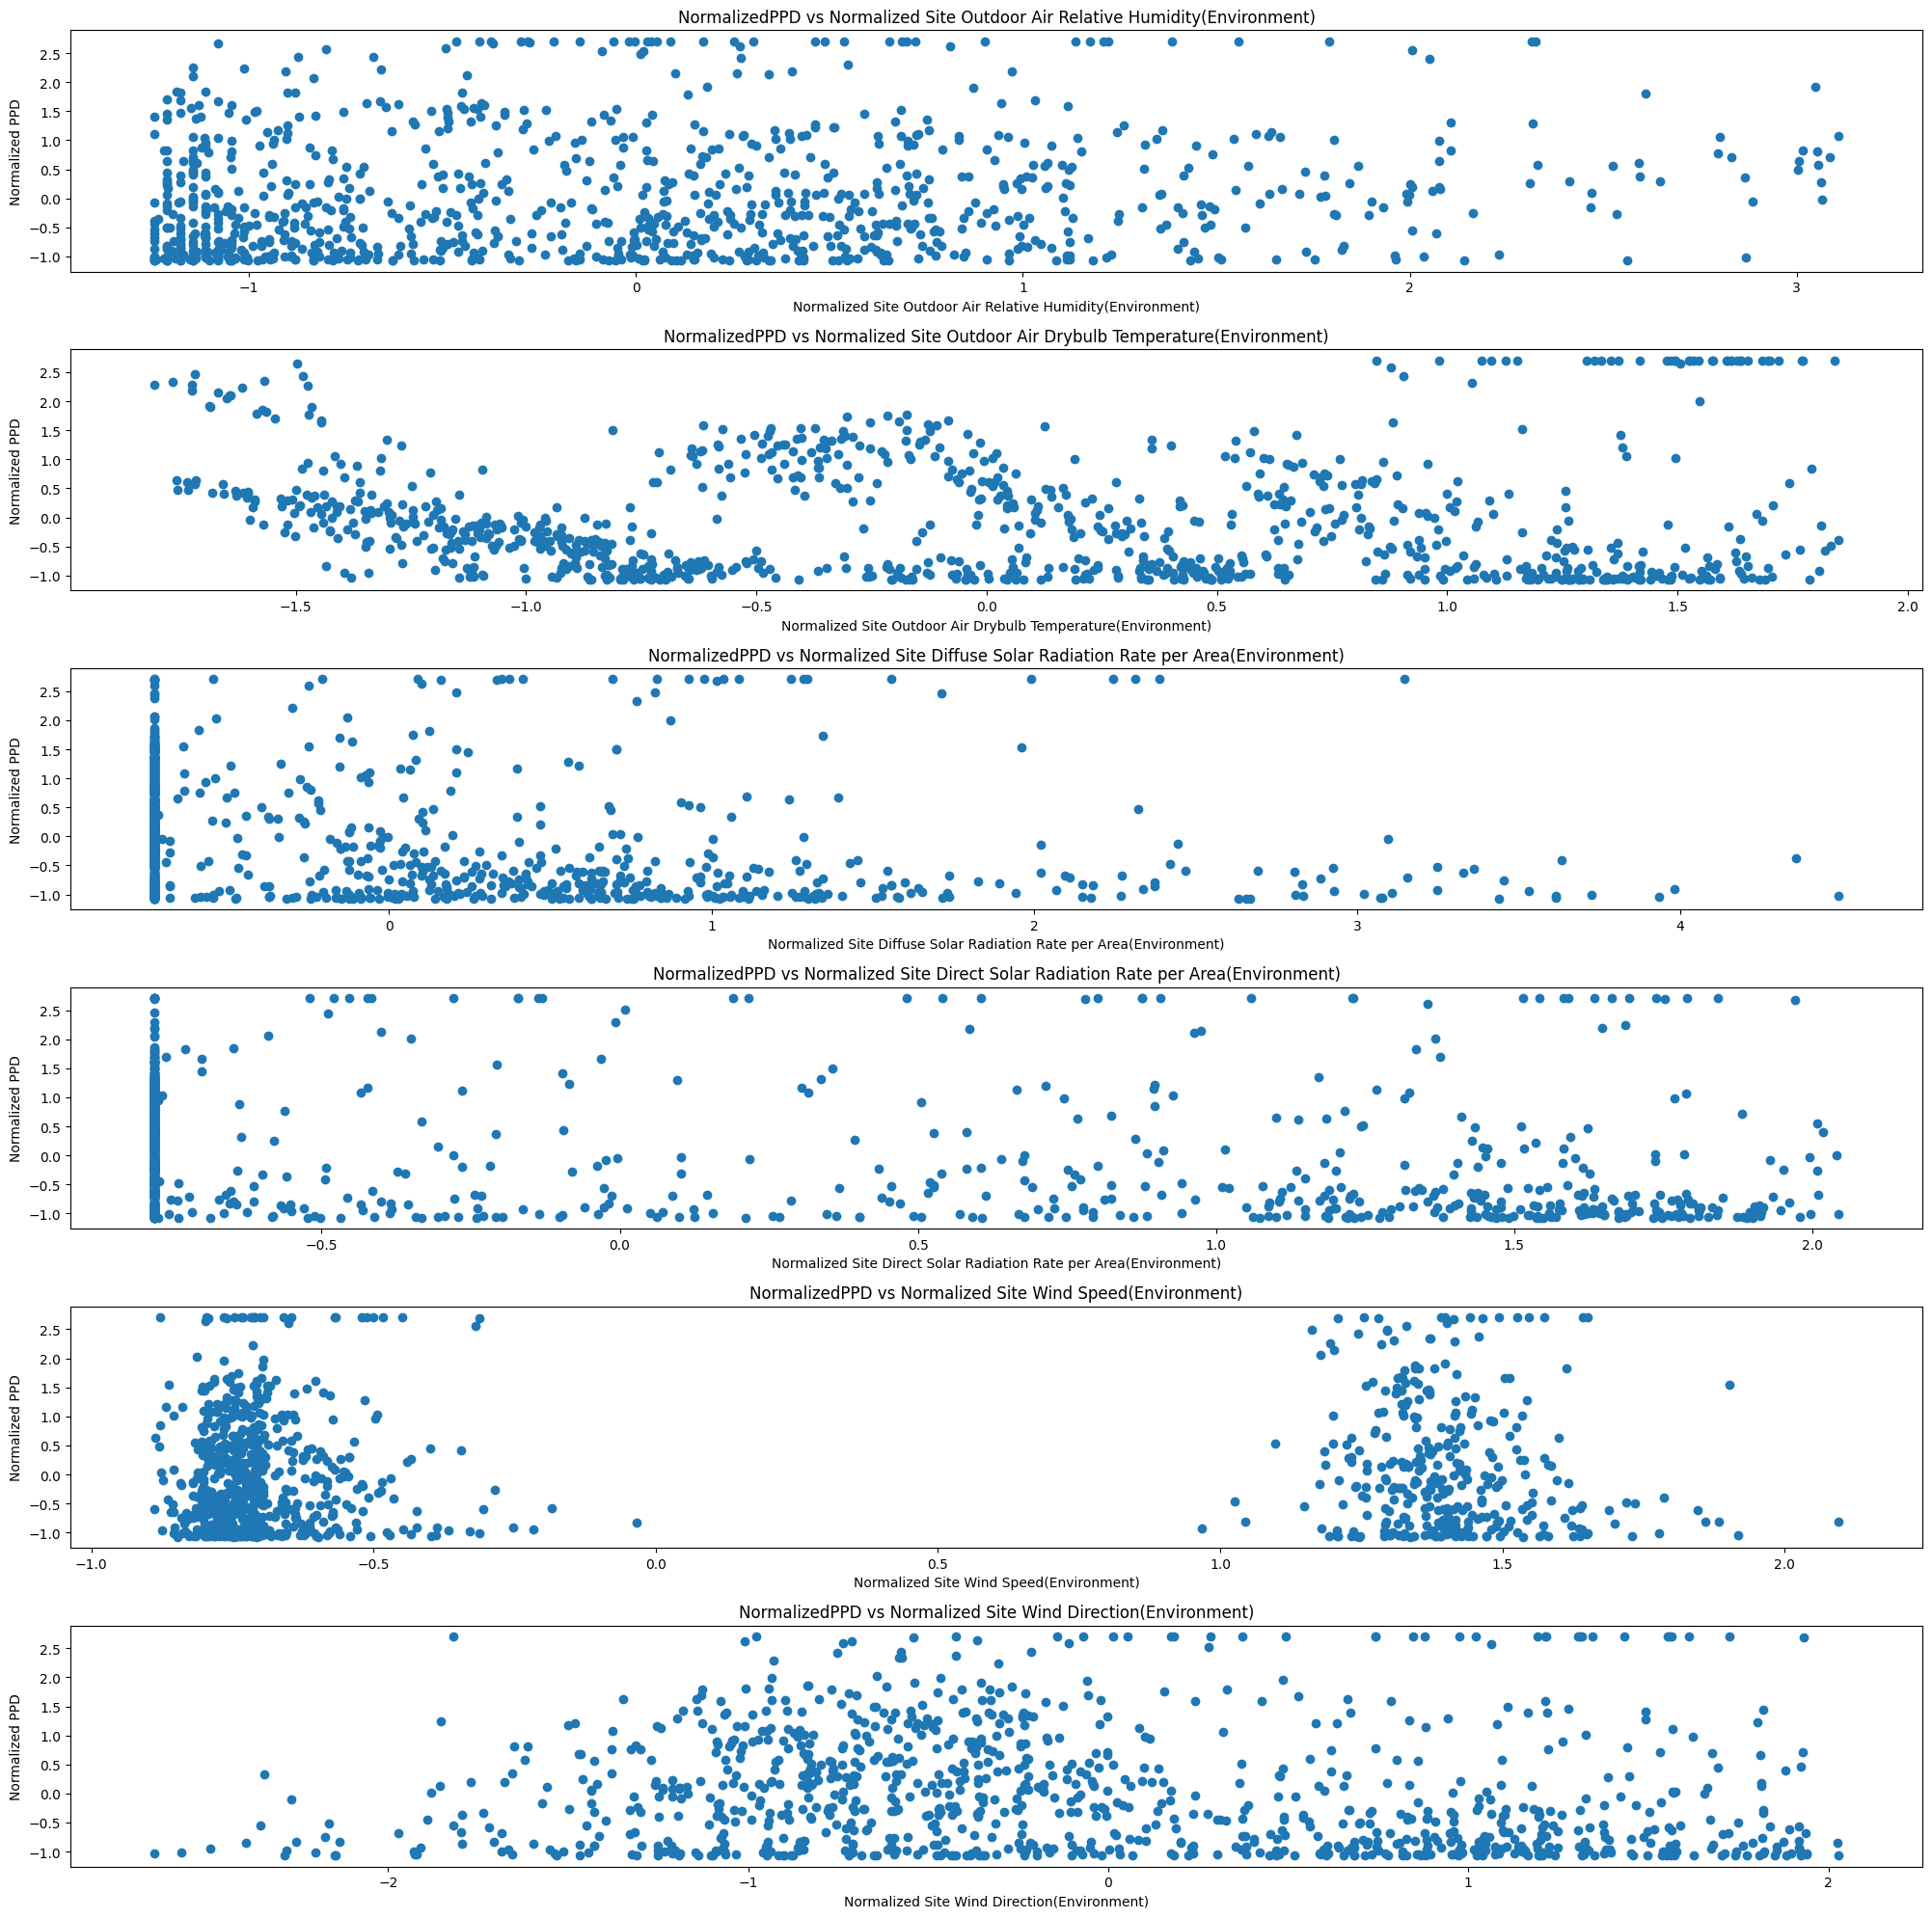

In [24]:
fig, axes = plt.subplots(6, 1, figsize=(20,20))
for i, key in enumerate(X_train.columns):
    rand_idxs = np.random.permutation(len(X_train[key]))[:1000]
    axes[i].scatter(X_train[key].iloc[rand_idxs], y_train.iloc[rand_idxs])
    axes[i].set_title(f"NormalizedPPD vs Normalized {key}")
    axes[i].set_xlabel(f"Normalized {key}")
    axes[i].set_ylabel("Normalized PPD")
plt.tight_layout()

In [ ]:
# df2["Site Outdoor Air Relative Humidity(Environment)"].describe()

In [ ]:
# df2.describe()

In [ ]:
# import sinergym_wrapper
# config = {"use_rbc": True, "weather_variability": [{'drybulb': (1.0, 0, 0.001)}, {'drybulb': (10.0, 0, 0.001)}]}
# env = sinergym_wrapper.SinergymWrapper(config)

[2023-01-20 11:33:01,388] EPLUS_ENV_Eplus-5Zone-hot-discrete-stochastic-v1-FlexibleReset2099808_MainThread_ROOT INFO:Updating idf ExternalInterface object if it is not present...
[2023-01-20 11:33:01,388] EPLUS_ENV_Eplus-5Zone-hot-discrete-stochastic-v1-FlexibleReset2099808_MainThread_ROOT INFO:Updating idf ExternalInterface object if it is not present...
[2023-01-20 11:33:01,388] EPLUS_ENV_Eplus-5Zone-hot-discrete-stochastic-v1-FlexibleReset2099808_MainThread_ROOT INFO:Updating idf ExternalInterface object if it is not present...
[2023-01-20 11:33:01,388] EPLUS_ENV_Eplus-5Zone-hot-discrete-stochastic-v1-FlexibleReset2099808_MainThread_ROOT INFO:Updating idf ExternalInterface object if it is not present...
[2023-01-20 11:33:01,390] EPLUS_ENV_Eplus-5Zone-hot-discrete-stochastic-v1-FlexibleReset2099808_MainThread_ROOT INFO:Updating idf Site:Location and SizingPeriod:DesignDay(s) to weather and ddy file...
[2023-01-20 11:33:01,390] EPLUS_ENV_Eplus-5Zone-hot-discrete-stochastic-v1-Flexible

In [ ]:
# df = get_observations_df(1, use_wrapper=True)

[2023-01-20 11:33:01,878] EPLUS_ENV_Eplus-5Zone-hot-discrete-stochastic-v1-FlexibleReset2099808_MainThread_ROOT INFO:Creating new EnergyPlus simulation episode...
[2023-01-20 11:33:01,878] EPLUS_ENV_Eplus-5Zone-hot-discrete-stochastic-v1-FlexibleReset2099808_MainThread_ROOT INFO:Creating new EnergyPlus simulation episode...
[2023-01-20 11:33:01,878] EPLUS_ENV_Eplus-5Zone-hot-discrete-stochastic-v1-FlexibleReset2099808_MainThread_ROOT INFO:Creating new EnergyPlus simulation episode...
[2023-01-20 11:33:01,878] EPLUS_ENV_Eplus-5Zone-hot-discrete-stochastic-v1-FlexibleReset2099808_MainThread_ROOT INFO:Creating new EnergyPlus simulation episode...
[2023-01-20 11:33:02,008] EPLUS_ENV_Eplus-5Zone-hot-discrete-stochastic-v1-FlexibleReset2099808_MainThread_ROOT INFO:EnergyPlus working directory is in /mnt/7076984276980B4C/ssd_backup/ActiveRL/Eplus-env-Eplus-5Zone-hot-discrete-stochastic-v1-FlexibleReset2099808-res4/Eplus-env-sub_run1
[2023-01-20 11:33:02,008] EPLUS_ENV_Eplus-5Zone-hot-discrete

In [ ]:
# df.describe()

,year,month,day,hour,Site Outdoor Air Drybulb Temperature(Environment),Site Outdoor Air Relative Humidity(Environment),Site Wind Speed(Environment),Site Wind Direction(Environment),Site Diffuse Solar Radiation Rate per Area(Environment),Site Direct Solar Radiation Rate per Area(Environment),Zone Thermostat Heating Setpoint Temperature(SPACE1-1),Zone Thermostat Cooling Setpoint Temperature(SPACE1-1),Zone Air Temperature(SPACE1-1),Zone Thermal Comfort Mean Radiant Temperature(SPACE1-1 PEOPLE 1),Zone Air Relative Humidity(SPACE1-1),Zone Thermal Comfort Clothing Value(SPACE1-1 PEOPLE 1),Zone Thermal Comfort Fanger Model PPD(SPACE1-1 PEOPLE 1),Zone People Occupant Count(SPACE1-1),People Air Temperature(SPACE1-1 PEOPLE 1),Facility Total HVAC Electricity Demand Rate(Whole Building)
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,1991.000029,6.526027,15.720548,11.500000,21.865202,34.920049,3.279827,189.607363,61.402205,275.772531,22.005479,25.338356,22.206486,23.212660,33.437544,0.590532,29.868036,3.179075,22.206486,8519.151102
std,0.005342,3.447901,8.796373,6.922285,12.934604,23.680586,1.720488,81.444233,84.530399,353.390559,2.830399,2.594532,2.129341,3.305969,17.104138,0.148360,23.830308,4.614632,2.129341,5601.062147
min,1991.000000,1.000000,1.000000,0.000000,-23.282750,3.000000,0.000000,0.000000,0.000000,0.000000,20.000000,23.500000,16.914873,15.853123,3.398928,0.460000,5.000000,0.000000,16.914873,181.328925
25%,1991.000000,4.000000,8.000000,5.750000,12.844194,16.000000,2.100000,130.000000,0.000000,0.000000,20.000000,23.500000,20.000161,20.252980,19.879909,0.476795,9.057495,0.000000,20.000161,3721.181202
50%,1991.000000,7.000000,16.000000,11.500000,21.968177,29.250000,2.887500,165.000000,0.000000,0.000000,20.000000,23.500000,22.117742,22.953729,29.731767,0.544289,20.920469,0.000000,22.117742,8197.533838
75%,1991.000000,10.000000,23.000000,17.250000,30.955145,48.000000,4.100000,262.500000,109.000000,651.562500,26.000000,29.000000,23.499840,25.600846,45.106093,0.618918,49.103919,8.800000,23.499840,13926.450639
max,1992.000000,12.000000,31.000000,23.000000,61.612924,100.000000,13.900000,357.500000,588.000000,1033.000000,26.000000,29.000000,28.997716,35.146179,82.443394,1.000000,97.942144,11.000000,28.997716,30002.261195
